# Classifying HotDog or Not HotDog with Single Layer Neural Networks

**The hidden layer has the activation function $tanh(x)$ and the output layer has the sigmoid, $\sigma (x)$, activation function. **

This a repurposing of coding assignment 3 from Coursera's intro to nueral network class

In [21]:
# Package imports
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from PIL import Image
from scipy import ndimage
#from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from numpy import loadtxt

%matplotlib inline

In [44]:
##load data sets
num_px = 128

train_set_x_flatten = loadtxt('seefood_test_x.csv', delimiter=',')
train_set_y_flatten = loadtxt('seefood_test_y.csv', delimiter=',')
train_set_y         = train_set_y_flatten.reshape(1,train_set_y_flatten.size)

test_set_x_flatten  = loadtxt('seefood_train_x.csv', delimiter=',')
test_set_y_flatten  = loadtxt('seefood_train_y.csv', delimiter=',')
test_set_y          = test_set_y_flatten.reshape(1,test_set_y_flatten.size)

train_set_x = train_set_x_flatten/255.
test_set_x  = test_set_x_flatten/255.

print("train_set_x shape = " + str(train_set_x.shape))
print("train_set_y shape = " + str(train_set_y.shape))
print("test_set_x shape = " + str(test_set_x.shape))
print("test_set_y shape = " + str(test_set_y.shape))

train_set_x shape = (49152L, 500L)
train_set_y shape = (1L, 500L)
test_set_x shape = (49152L, 498L)
test_set_y shape = (1L, 498L)


# Logistic Regression for comparison using sklearn

In [45]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(train_set_x.T, train_set_y.T);

LR_predictions = clf.predict(train_set_x.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(train_set_y,LR_predictions) + np.dot(1-train_set_y,1-LR_predictions))/float(train_set_y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints in training set)")

LR_predictions2 = clf.predict(test_set_x.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(test_set_y,LR_predictions2) + np.dot(1-test_set_y,1-LR_predictions2))/float(test_set_y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints in test set)")



Accuracy of logistic regression: 98 % (percentage of correctly labelled datapoints in training set)
Accuracy of logistic regression: 57 % (percentage of correctly labelled datapoints in test set)


In [27]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1.0/(1.0+np.exp(-z))
    
    
    return s

In [28]:
# layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X[:,0].size # size of input layer
    n_h = 4
    n_y = Y[:,0].size # size of output layer
    
    return (n_x, n_h, n_y)

In [29]:
layer_sizes(train_set_x, train_set_y)

(49152, 4, 1)

In [30]:
# initialize_parameters randomly

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [31]:
# forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [32]:
# compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost 
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = (-1.0/m) * np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [33]:
# backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1.0/m) * np.dot(dZ2, np.transpose(A1))
    db2 = (1.0/m) * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(np.transpose(W2), dZ2) * (1.0 - np.power(A1, 2))
    dW1 = (1.0/m) * np.dot(dZ1, np.transpose(X))
    db1 = (1.0/m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [34]:
# update_parameters

def update_parameters(parameters, grads, learning_rate = 0.01):
    """
    Updates parameters using the gradient descent 
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [35]:
# nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    #np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop (gradient descent)
    
    costs = []
    
    for i in range(0, num_iterations):
         
        
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        
        # Record the costs
        #if i % 100 == 0:
        #    costs.append(cost)
        costs.append(cost)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
        #if print_cost == num_iterations:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters, costs

In [36]:
# predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

Cost after iteration 0: 0.693225
Cost after iteration 1000: 0.498271
Cost after iteration 2000: 0.436261
Cost after iteration 3000: 0.345381
Cost after iteration 4000: 0.088459
Classification accuracy for training set: 99%
Classification accuracy for testing set: 55%


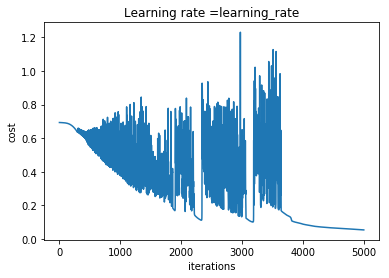

In [46]:
parameters,costs = nn_model(train_set_x, train_set_y, n_h = 4, num_iterations = 5000, print_cost=True)


# Print accuracy
predictions = predict(parameters, train_set_x)
#print(np.mean(predictions))
print ('Classification accuracy for training set: %d' % float((np.dot(train_set_y,predictions.T) + np.dot(1-train_set_y,1-predictions.T))/float(train_set_y.size)*100.0) + '%')

predictions_test = predict(parameters, test_set_x)
#print(np.mean(predictions_test))
print ('Classification accuracy for testing set: %d' % float((np.dot(test_set_y,predictions_test.T) + np.dot(1-test_set_y,1-predictions_test.T))/float(test_set_y.size)*100.0) + '%')


# Plot learning curve (with costs)
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str("learning_rate"))
plt.show()

In [47]:

#plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20]
#hidden_layer_sizes = np.asarray(hidden)
for i, n_h in enumerate(hidden_layer_sizes):
    parameters,costs = nn_model(train_set_x, train_set_y, n_h, num_iterations = 5000)
    
    predictions_train = predict(parameters, train_set_x)
    accuracy_train = float((np.dot(train_set_y,predictions_train.T) + np.dot(1-train_set_y,1-predictions_train.T))/float(train_set_y.size)*100)
    
    predictions_test = predict(parameters, test_set_x)
    accuracy_test = float((np.dot(test_set_y,predictions_test.T) + np.dot(1-test_set_y,1-predictions_test.T))/float(test_set_y.size)*100)
    
    #print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    print('Training set accuracy with ' + str(n_h) + ' hidden units: ' + str(accuracy_train))
    print('Testing set accuracy with ' + str(n_h) + ' hidden units: ' + str(accuracy_test))

Training set accuracy with 1 hidden units: 97.0
Testing set accuracy with 1 hidden units: 55.6224899598
Training set accuracy with 2 hidden units: 98.2
Testing set accuracy with 2 hidden units: 55.6224899598
Training set accuracy with 3 hidden units: 96.0
Testing set accuracy with 3 hidden units: 55.0200803213
Training set accuracy with 4 hidden units: 98.4
Testing set accuracy with 4 hidden units: 54.2168674699
Training set accuracy with 5 hidden units: 100.0
Testing set accuracy with 5 hidden units: 53.8152610442
Training set accuracy with 20 hidden units: 100.0
Testing set accuracy with 20 hidden units: 56.2248995984


Hotdog


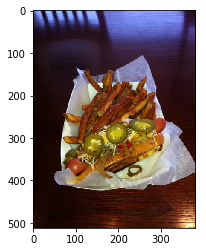

In [49]:
my_image = "hotdog_test.jpg"   # change this to the name of your image file 

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image.size
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(parameters, my_image)

if my_predicted_image == 0:
    print("Not Hotdog")
else: 
    print("Hotdog")

plt.imshow(image)